# Assignment 35

## Numerical integration of the equations of motion for a charged particle in a crossed electromagnetic field 

We have the following numerical integration problem: 

$$\frac{d\mathbf{v}}{dt} = \mathbf{\hat{e}}_{y} + \mathbf{v} \times  \mathbf{\hat{e}}_{z} = \mathbf{\hat{e}}_{y} + v_{y}(t)\mathbf{e}_{x} - v_{x}(t)\mathbf{e}_{y} = v_{y}(t)\mathbf{e}_{x} + (1 - v_{x}(t))\mathbf{e}_{y} \\  \frac{d\mathbf{r}}{dt} = \mathbf{v} \\ x(0) = y(0) = 0 \\ v_{x}(0) = -4 \\ v_{y}(0) = -2$$

Note that: 

$$\mathbf{r}(t) = (x(t), \ y(t)) = x(t)\mathbf{e}_{x} + y(t)\mathbf{e}_{y} \\ \mathbf{r}' = \mathbf{v} = (v_{x}(t), \ v_{y}(t)) = v_{x}(t)\mathbf{e}_{x} + v_{y}(t)\mathbf{e}_{y}$$

We need to cast the above in terms of the update rules for euler, heun, and rk. We start with euler. For euler, we have, 

$$\mathbf{r}_{n + 1} = \mathbf{r}_{n} + \Delta t \mathbf{f}(t_{n}, \mathbf{r}_{n}) = \mathbf{r}_{n} + \Delta t \mathbf{v}(t_{n}, \mathbf{r}_{n})$$

$$\mathbf{v}_{n + 1} = \mathbf{v}_{n} + \Delta t \mathbf{g}(t_{n}, \mathbf{V}_{n}) = \mathbf{v}_{n} + \Delta t (v_{y}(t_{n}), \  (1 - v_{x}(t_{n})))$$


                             euler


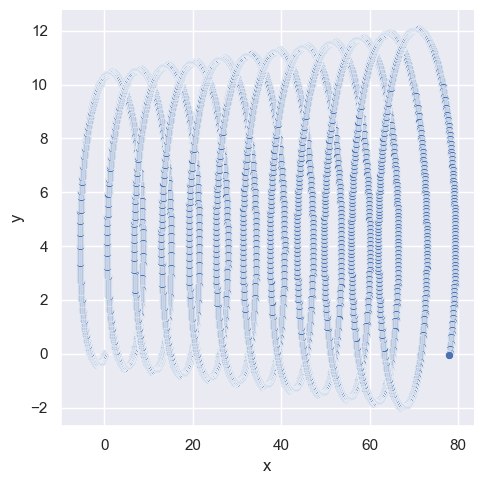

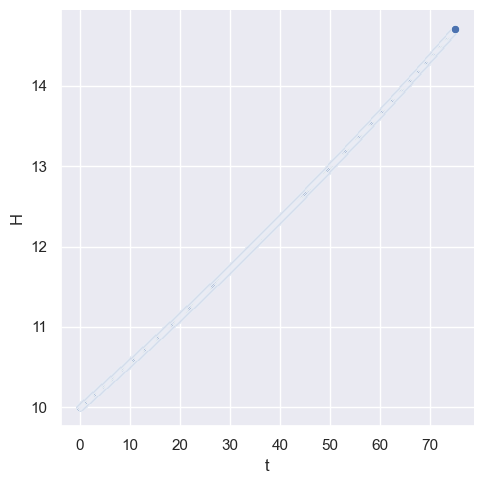


                               heun


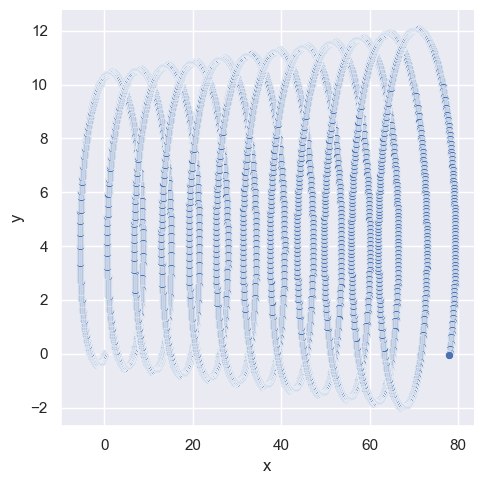

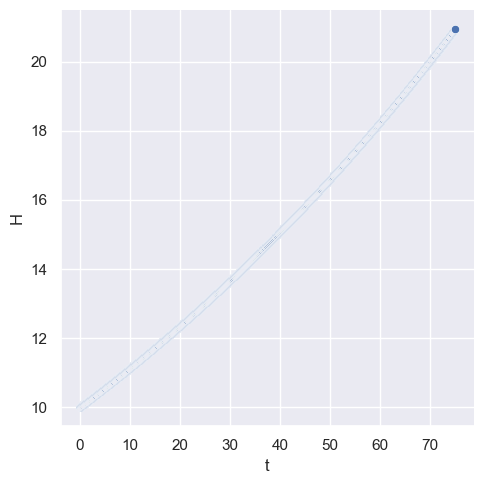


                         runge-kutta


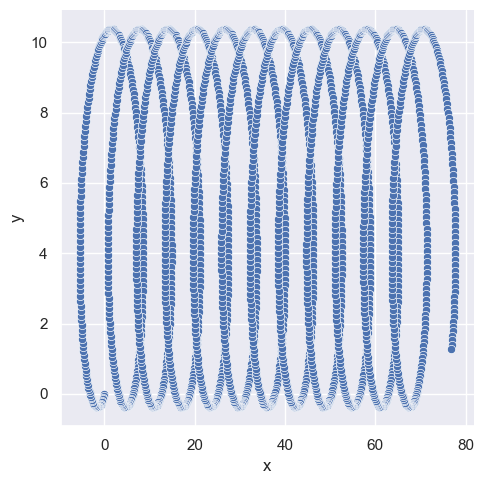

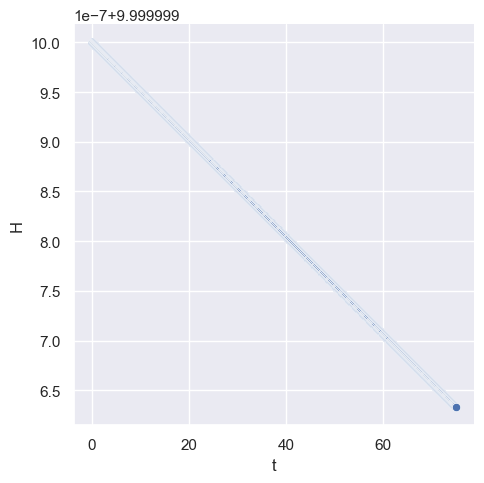

In [2]:
# jupyter nbconvert --to webpdf assignment33.ipynb
from copy import deepcopy
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")
from tabulate import tabulate


def k(h: float, f: float) -> float:
    return h * f


def runge_kutta(k1, k2, k3, k4):
    return (1.0 / 6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)


def heun(k1, k2):
    return 0.5 * (k1 + k2)


# X = [x, y, vx, vy]

f1 = lambda x: x[2]
f2 = lambda x: x[3]
g1 = lambda x: x[3]
g2 = lambda x: 1 - x[2]

h = lambda x: (0.5 * (x[2] ** 2 + x[3] ** 2)) - x[1]

F = [f1, f2, g1, g2]

def solve_euler(ti: float, tf: float, intrvls: int, X0: list, F: list) -> list:
    """
    ti: initial time
    tf: final time
    intrvls: number of intervals into which tf - ti is divided
    X0: inital X values
    F: components of f(t, x)
    """
    h = (tf - ti) / intrvls
    X = [deepcopy(X0) for i in range(intrvls)]
    for t in range(1, intrvls):
        for i in range(len(X0)):
            X[t][i] = X[t - 1][i] + k(h, F[i](X[t - 1]))
    return X


def solve_heun(ti: float, tf: float, intrvls: int, X0: list, F: list) -> list:
    """
    ti: initial time
    tf: final time
    intrvls: number of intervals into which tf - ti is divided
    X0: inital X values
    F: components of f(t, x)
    """
    h = (tf - ti) / intrvls
    X = [deepcopy(X0) for i in range(intrvls)]
    for t in range(1, intrvls):
        x = np.array(X[t - 1])
        k1 = np.array([k(h, F[i](x)) for i in range(x.size)])
        k2 = np.array([k(h, F[i](x + 0.5 * k1)) for i in range(len(X0))])
        for i in range(len(X0)):
            X[t][i] = X[t - 1][i] + heun(k1[i], k2[i])

    return X


def solve_runge_kutta(ti: float, tf: float, intrvls: int, X0: list, F: list) -> list:
    """
    ti: initial time
    tf: final time
    intrvls: number of intervals into which tf - ti is divided
    X0: inital X values
    F: components of f(t, x)
    """
    h = (tf - ti) / intrvls
    X = [deepcopy(X0) for i in range(intrvls)]
    for t in range(1, intrvls):
        x = np.array(X[t - 1])
        k1 = np.array([k(h, F[i](x)) for i in range(x.size)])
        k2 = np.array([k(h, F[i](x + 0.5 * k1)) for i in range(len(X0))])
        k3 = np.array([k(h, F[i](x + 0.5 * k2)) for i in range(len(X0))])
        k4 = np.array([k(h, F[i](x + k3)) for i in range(len(X0))])
        for i in range(len(X0)):
            X[t][i] = X[t - 1][i] + runge_kutta(k1[i], k2[i], k3[i], k4[i])

    return X


table1 = solve_euler(0, 75, 10000, [0, 0, -4, -2], F)
xy_euler = [table1[i][0:2] for i in range(len(table1))]
print("\n                             euler")
fig1 = sns.relplot(data=pd.DataFrame(xy_euler, columns=["x", "y"]), x="x", y="y")
plt.show()
plt.close()

H = [h(x) for x in table1]
Ht = list(zip(np.linspace(0, 75, 5000), H))

fig1_1 = sns.relplot(data=pd.DataFrame(Ht, columns=["t", "H"]), x="t", y="H")
plt.show()
plt.close()


table2 = solve_heun(0, 75, 5000, [0, 0, -4, -2], F)
xy_heun = [table2[i][0:2] for i in range(len(table2))]
print("\n                               heun")
fig2 = sns.relplot(data=pd.DataFrame(xy_euler, columns=["x", "y"]), x="x", y="y")
plt.show()
plt.close()

H = [h(x) for x in table2]
Ht = list(zip(np.linspace(0, 75, 5000), H))

fig2_1 = sns.relplot(data=pd.DataFrame(Ht, columns=["t", "H"]), x="t", y="H")
plt.show()
plt.close()


table3 = solve_runge_kutta(0, 75, 2500, [0, 0, -4, -2], F)
xy_rk = [table3[i][0:2] for i in range(len(table3))]
print("\n                         runge-kutta")
fig3 = sns.relplot(data=pd.DataFrame(xy_rk, columns=["x", "y"]), x="x", y="y")
plt.show()
plt.close()

H = [h(x) for x in table3]
Ht = list(zip(np.linspace(0, 75, 2500), H))

fig3_1 = sns.relplot(data=pd.DataFrame(Ht, columns=["t", "H"]), x="t", y="H")
plt.show()
plt.close()